In [2]:
## Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset
dataset= pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[ : , 1:-1 ]
y=dataset.iloc[ : , -1 ]

Training the linear regression model on the whole dataset

In [3]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

Predicting the linear regression results

In [4]:
pred_salary= regressor.predict(X)


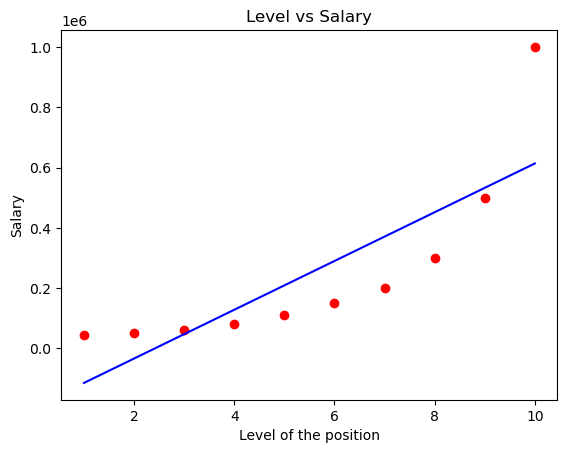

In [5]:
plt.scatter(X, y, color='red')
plt.plot(X, pred_salary, color='blue')
plt.title('Level vs Salary')
plt.xlabel('Level of the position')
plt.ylabel('Salary')
plt.show()

## Creating polynomial features of the independent variable

In [6]:
from sklearn.preprocessing import PolynomialFeatures
pf= PolynomialFeatures(degree=4)
poly_X= pf.fit_transform(X)
poly_X

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

## Training the polynomial regression model on the whole dataset

In [7]:
poly_reg= LinearRegression()
poly_reg.fit(poly_X, y)

LinearRegression()

## Predicting the polynomial regression results

In [8]:
y_pred= poly_reg.predict(poly_X)


In [9]:
print(y)

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


In [10]:
print(y_pred)

[ 53356.64335681  31759.90675996  58642.19114221  94632.86713289
 121724.94172498 143275.05827508 184003.49650349 289994.17249411
 528694.63869452 988916.08391594]


## Visualizing the polynomial regression result

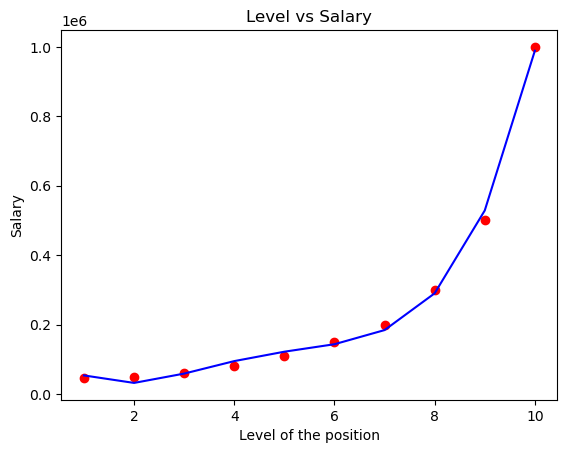

In [11]:
plt.scatter(X, y, color='red')
plt.plot(X,y_pred, color='blue')
plt.title('Level vs Salary')
plt.xlabel('Level of the position')
plt.ylabel('Salary')
plt.show()

## predicting the new result using the polynomial regression model

In [12]:
poly_reg.predict(pf.fit_transform([[6.5]]))

array([158862.45265153])

## Building a polynomial regression equation

In [13]:
import statsmodels.api as sm


regressor_OLS = sm.OLS(y,poly_X).fit()
regressor_OLS.summary()

D:\plant_pathology\anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     478.1
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.21e-06
Time:                        11:56:31   Log-Likelihood:                -110.01
No. Observations:                  10   AIC:                             230.0
Df Residuals:                       5   BIC:                             231.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.842e+05   6.78e+04      2.718      0.042    9963.382    3.58e+05
x1          -2.11e+05   7.64e+04     -2.762      0.040   -4.07e+05   -1.47e+04
x2          9.477e+04   2.65e+04      3.582      0.016    2.68e+04    1.63e+05
x3         -1.546e+04   3534.989     -4.374      0.007   -2.46e+04   -6376.309
x4           890.1515    159.803      5.570      0.003     479.364    1300.939
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.767
Skew:                          -0.529   Prob(JB):                        0.681
Kurtosis:                       2.149   Cond. No.                     6.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
Y= 184200 - 211000*6+ 94770*36- 15460*216 + 890.1515*1296
Y

144196.34400000004

In [15]:
intercept=poly_reg.intercept_
intercept

184166.6666670672

In [16]:
coefficient= poly_reg.coef_
coefficient

array([      0.        , -211002.33100266,   94765.44289054,
        -15463.2867133 ,     890.15151515])